In [1]:
from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

In [65]:
data = pd.read_csv('data/ex2data1.txt', delimiter=',', header=None)

In [270]:
data.head(5)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [271]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [56]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None, legendLoc=4):
    positiveIndeces = data.iloc[:, -1] == 1
    negativeIndeces = data.iloc[:, -1] == 0
    
    plt.xlim(round(min(data.iloc[:,0]))-data.iloc[:,0].std()/2, round(max(data.iloc[:,0]))+data.iloc[:,0].std()/2)
    plt.ylim(round(min(data.iloc[:,1]))-data.iloc[:,1].std()/2, round(max(data.iloc[:,1]))+data.iloc[:,0].std()/2)
    
    if axes == None: 
        axes = plt.gca()

    axes.scatter(data.loc[negativeIndeces, :].iloc[:, 0], data.loc[negativeIndeces, :].iloc[:, 1], c='y', s=60, label=label_neg)
    axes.scatter(data.loc[positiveIndeces, :].iloc[:, 0], data.loc[positiveIndeces, :].iloc[:, 1], marker = '+', c='k', s=60, linewidth=2, label=label_pos)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(loc=legendLoc)

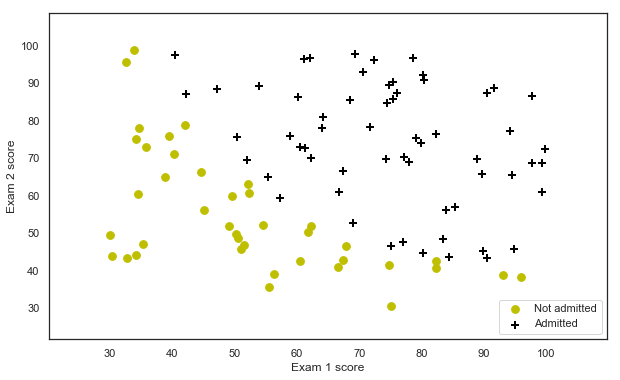

In [52]:
# Exam scores
X = data.iloc[:,:-1].values
X = np.c_[np.ones((X.shape[0],1)), X[:,0:2]]
y = data.iloc[:,-1]
y = y[:, np.newaxis]

plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

## Logistic Regression

**Logistic Hypothesis**
\begin{align}
h_\theta = g(\theta^T x)\\
\end{align}

\begin{align}
g(z) = \frac{1}{1+e^{-z}}\\
\end{align}

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

**Cost Function**

\begin{align}
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]
\end{align}

**Vectorized Cost Function**

\begin{align}
J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)
\end{align}

In [68]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))

    J = -(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    
    return np.inf if np.isnan(J[0]) else J[0]

**Cost Function's Partial Derivative**
\begin{align}
\frac{\partial{J(\theta)}}{\partial{\theta_j}} = \frac{1}{m} \sum^{m}_{i=1} (h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}
\end{align}
**Cost Function's Vectorized Derivative**
\begin{align}
\frac{\partial{J(\theta)}}{\partial{\theta_j}} = \frac{1}{m} X^{T}(g(X\theta)-y)
\end{align}

In [66]:
def gradient(theta, X, y):
    m = y.size
    #perform the reshape here since minimize requires theta with a shape of [m,]
    h = sigmoid(X.dot(theta.reshape(-1,1)))

    return ((1/m)*X.T.dot(h-y)).ravel()

In [69]:
theta = np.zeros(X.shape[1])
print('Cost:', costFunction(theta, X,y))
print('Grad:', gradient(theta, X,y))

Cost: 0.6931471805599453
Grad: [1.87880932e-02 7.77711864e-05]


**Optimize the Cost function using Scipy's Optimize Module**

In [450]:
res = minimize(costFunction, theta, args=(X,y), method=None, jac=gradient, options={'maxiter': 400});
res

D:\Users\F180024\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
D:\Users\F180024\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557633e-09,  4.36433478e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [4]:
def predict(theta, X, threshold=0.5):
    prob = sigmoid(X.dot(theta.T)) >= threshold
    return prob.astype('int')

In [326]:
# Predict for a student with exam scores [45, 85], y=0.776
sigmoid(np.array([1,45,85]).dot(res.x.T))

0.7762903249331021

**Plot the decision boundary**

<Figure size 3240x3600 with 0 Axes>

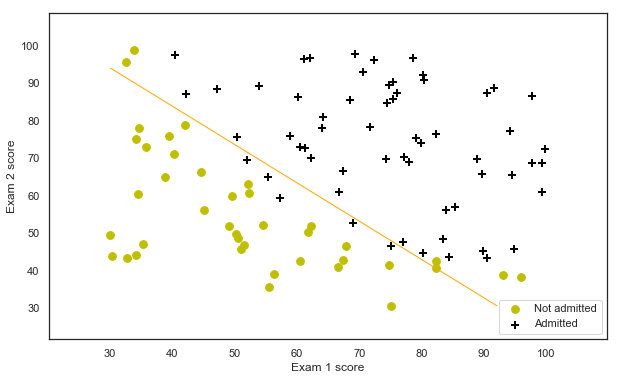

In [468]:
plt.figure(figsize=(45,50))
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

xx, yy = np.linspace(X[:,1].min(), X[:,1].max()), np.linspace(X[:,2].min(), X[:,2].max())
xv, yv = np.meshgrid(xx, yy)
h = sigmoid(np.c_[np.ones((xv.ravel().shape[0], 1)), xv.ravel(), yv.ravel()].dot(res.x))
plt.contour(xv, yv, h.reshape(xv.shape), levels=[0.5], linewidths=1, colors='orange')
plt.show()

## Regularized Logistic Regression

In [5]:
chipDatadf = pd.read_csv('data/ex2data2.txt', delimiter=',', header=None)

In [6]:
chipDatadf.head(5)

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [7]:
chipDatadf.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


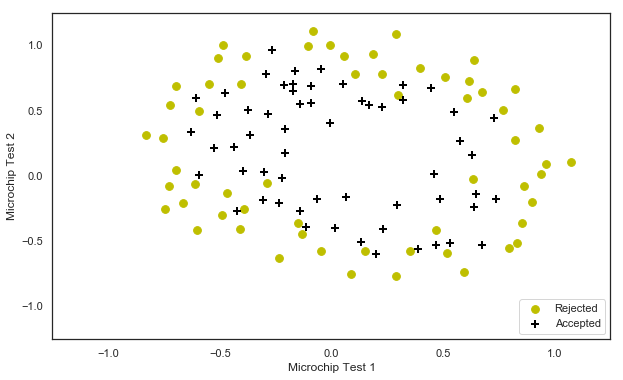

In [124]:
plotData(chipDatadf, 'Microchip Test 1', 'Microchip Test 2', 'Accepted', 'Rejected')

### Incorporating Polynomials

In [8]:
chipData = chipDatadf.values
# SkLearn's PolynomialFeatures function generates a feature matrix of all polynomial interactions, including the constant term 1
polyfeat = PolynomialFeatures(6, interaction_only=False)
X = chipData[:,0:2]
Xpoly = polyfeat.fit_transform(X)
y = chipData[:,2][:, np.newaxis]

Xpoly.shape

(118, 28)

**Regularized Cost Function**

\begin{align}
J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}
\end{align}

**Vectorized Cost Function**

\begin{align}
J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}
\end{align}

In [9]:
def costFunctionRegularized(theta, regcoeff=1, *args):
    m = y.size
    h = sigmoid(Xpoly.dot(theta))
    # recall not to regularize the first parameter
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))+(regcoeff/(2*m))*np.sum(np.square(theta[1:]))
    
    return np.inf if np.isnan(J[0]) else J[0]

**Cost Function's Partial Derivative**

\begin{align}
\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}
\end{align}

**Vectorized Cost Function's Partial Derivative**

\begin{align}
\frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}
\end{align}

In [10]:
def gradientRegularized(theta, regcoeff, *args):
    m = y.size
    h = sigmoid(Xpoly.dot(theta.reshape(-1,1)))
    # The end of the expression reflects the need for matrix operations' arguments
    # to have the same dimensions. Given the first theta is removed, accomodate 
    # by inserting a zero at the beginning.
    
    # Note: Flattening is required for Scipy's Minimize function
    return ((1/m) * Xpoly.T.dot(h-y) + (regcoeff/m)*np.r_[[[0]], theta[1:].reshape(-1,1)]).flatten()

In [11]:
init_theta = np.zeros(Xpoly.shape[1])
# Cost function should yield 0.693
costFunctionRegularized(init_theta, 1, Xpoly, y)

0.6931471805599453

## Different Regularization Parameters

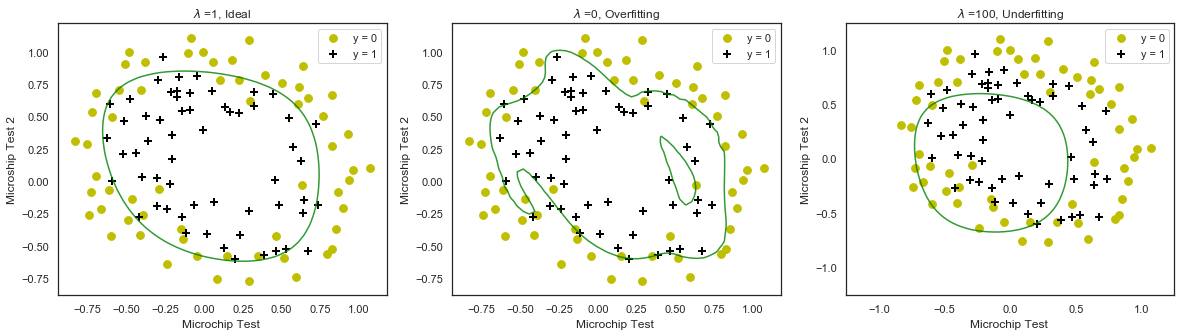

In [69]:
figure, axes = plt.subplots(1, 3, figsize=(20,5))

for i, v in enumerate([1, 0, 100]):
    # Find the optimal values for theta using GD and 
    res = minimize(costFunctionRegularized, init_theta, args=(v, Xpoly, y), method=None, jac=gradientRegularized, options={'maxiter': 3000});
    
    modelAccuracy = 100* np.sum(predict(res.x, Xpoly) == y.ravel())/ len(y)
    plotData(chipDatadf , 'Microchip Test ', 'Microship Test 2', "y = 1", "y = 0", axes[i], 1)
    
    xx, yy = np.linspace(X[:,0].min(), X[:,0].max()), np.linspace(X[:,1].min(), X[:,1].max())
    vx, vy = np.meshgrid(xx, yy)

    g_h = sigmoid(polyfeat.fit_transform(np.c_[vx.ravel(), vy.ravel()]).dot(res.x))
    axes[i].contour(vx, vy, g_h.reshape(vx.shape), [0.5], linewidths=1.5, alpha=0.8, colors='g')
    fittingString = 'Ideal'
    
    if v == 0:
        fittingString = 'Overfitting'
    elif v == 100:
        fittingString = 'Underfitting'
    
    axes[i].set_title(r'$\lambda$ ={}, {}'.format(v, fittingString))